In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt

# 原物料價格處理

In [15]:
# mypath="/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/農業原物料期貨價格"
# files_name=os.listdir(mypath)
# dirs_list=[mypath+"/"+i for i in files_name]#農業原物料期貨價格資料夾內檔案
# list_name=[a[a.index('格')+2:a.index('.')] for a in dirs_list]#檔名建索引

#增加 stock_name
# for a,b in zip(dirs_list,list_name):
#     df=pd.read_csv(a)
#     df['stock_name']=b
#     df.to_csv(a)


# Primary Corn&Soybean Belt

There is lack of consensus regarding the constituents of the Corn Belt, although it often includes: Iowa, Illinois, Indiana, southern Michigan, western Ohio, eastern Nebraska, eastern Kansas, southern Minnesota, and parts of Missouri.[3] It also sometimes includes: South Dakota, North Dakota, all of Ohio, Wisconsin, all of Michigan, and Kentucky.[4]

'IA','IL','IN','KS','MI','OH','TN'

In [16]:
#select States

def beltArea(targets_list):

    df=pd.read_csv('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/weather_stations_US.csv',encoding='utf-8')
    df=df.dropna()
    targets = targets_list#['IA','IL','IN','KS','MN','MI','NE','OH']#Corn Belt
    df2=df[df['state'].apply(lambda a: any(word in a for word in targets))]
    df2['stn']=df2['stn'].astype('str')
    df2=df2[df2['stn']!='999999']#拿掉亂碼，並免拿到別州，每洲都有999999
    df3=df2.set_index('stn')
    
    return df3

beltArea(['IA','IL','IN','KS','MN','MI','NE','OH','TN'])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,country,state,lat,lon,elev
stn,,,,,,
690110,SELFRIDGE ANGB/TRAIN,US,MI,42.608,-82.835,177.0
690260,CHEBOYGAN,US,MI,45.650,-84.467,176.0
692644,MUSCATATUCK TRNG CTR,US,IN,39.050,-85.617,247.0
720103,WILMETTE MARINES,US,IL,42.070,-87.680,183.0
720113,OAKLAND TROY,US,MI,42.543,-83.178,222.0
720113,OAKLAND/TROY AIRPORT,US,MI,42.543,-83.178,218.2
720137,MORRIS MUNI J R WAS,US,IL,41.433,-88.417,178.0
720137,MORS MUNI-J.R. WSBRN FD AP,US,IL,41.425,-88.419,178.0
720141,MARSHALL CO,US,IL,41.019,-89.386,173.1


In [17]:
def firstDataProcess(year):
    
    USWeatherData=pd.read_csv('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_'+str(year)+'.csv',encoding='utf-8')
    USWeatherData['stn']=USWeatherData['stn'].astype('str')
    USWeatherData.iloc[:,2:5]=USWeatherData.iloc[:,2:5].astype(str)
    USWeatherData['date']=USWeatherData['year']+'-'+USWeatherData['mo']+'-'+USWeatherData['da']
    USWeatherData['date']=USWeatherData['date'].astype('datetime64[ns]')
    USWeatherData=USWeatherData.sort_values('date')
    USWeatherData=USWeatherData.set_index(['stn','date'])
    USWeatherData.to_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_'+str(year)+'.pickle')
    return USWeatherData


def selectArea(year,targets_list=None):
    
    USWeatherData=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_'+str(year)+'.pickle')
    USWeatherData=USWeatherData.loc[beltArea(targets_list).index.tolist()]
    return USWeatherData

In [18]:
# 選取特定state的各年份天氣資訊
df=pd.concat([selectArea(str(y),['IA','IL','IN','KS','MN','MI','NE','OH','TN']) for y in range(1960,2020)])
df.to_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea.pickle')
df


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,count_slp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
stn,date,,,,,,,,,,,,,,,,,,,,,
726580,1960-01-01,14922,1960,1,1,27.7,24,23.2,24,1021.8,24,...,*,0.31,G,999.9,0,0,1,0,0,0
725377,1960-01-01,14804,1960,1,1,27.8,24,25.5,24,1030.0,8,...,*,0.00,I,999.9,1,0,0,0,0,0
727450,1960-01-01,14913,1960,1,1,19.3,24,16.8,24,1024.0,24,...,NaN,0.20,G,11.0,1,0,1,0,0,0
724296,1960-01-01,13841,1960,1,1,28.9,24,22.4,24,1027.7,8,...,*,0.00,I,999.9,0,0,0,0,0,0
724285,1960-01-01,13812,1960,1,1,29.4,24,23.6,24,1028.8,8,...,*,0.00,I,999.9,0,0,0,0,0,0
724338,1960-01-01,13802,1960,1,1,30.8,24,24.6,24,1023.5,8,...,*,0.00,I,999.9,0,0,0,0,0,0
725300,1960-01-01,94846,1960,1,1,30.7,24,23.9,24,1026.2,24,...,NaN,0.00,G,999.9,0,0,0,0,0,0
725310,1960-01-01,14806,1960,1,1,28.9,24,23.5,24,1025.9,8,...,*,0.00,I,999.9,0,0,0,0,0,0
725335,1960-01-01,99999,1960,1,1,27.5,24,21.8,24,1026.8,8,...,*,0.00,I,999.9,0,0,0,0,0,0


# 讀資料

In [7]:
df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea.pickle')


# 資料統計分群

In [8]:
s1=df
s1['date2']=s1['year']+'-'+s1['mo']
s1['date2']=s1['date2'].astype('datetime64[ns]')

def dataMean(colName,groupbyIndex=list):
    if s1[colName].max()>1:
        dataMean=s1[s1[colName]<s1[colName].max()]#拿掉沒資料的
    else:
        dataMean=s1
    dataMean=dataMean.groupby(groupbyIndex)[colName].mean()
    return dataMean

def dataSum(colName,groupbyIndex):
    if s1[colName].max()>1:
        dataSum=s1[s1[colName]<s1[colName].max()]#拿掉沒資料的
    else:
        dataSum=s1
    dataSum=dataSum.groupby(groupbyIndex)[colName].sum()
    return dataSum

def dataMax(colName,groupbyIndex):
    if s1[colName].max()>1:
        dataMax=s1[s1[colName]<s1[colName].max()]#拿掉沒資料的
    else:
        dataMax=s1
    dataMax=dataMax.groupby(groupbyIndex)[colName].max()
    return dataMax

def dataMin(colName,groupbyIndex):
    if s1[colName].max()>1:
        dataMin=s1[s1[colName]<s1[colName].max()]#拿掉沒資料的
    else:
        dataMax=s1
    dataMin=dataMin.groupby(groupbyIndex)[colName].min()
    return dataMin

d1=dataMean('prcp',['date2'])

def weatherMS(CFMS,groupbyIndex):
    CFMSdf=pd.DataFrame({'weatherMS':CFMS})
    CFMSdf=CFMSdf.reset_index()
    CFMSdf[groupbyIndex]=CFMSdf[groupbyIndex].apply(lambda s:s.strftime('%Y%m'))
    CFMSdf['M']=CFMSdf[groupbyIndex].apply(lambda s:s[4:])
    return CFMSdf.groupby(['M'])['weatherMS'].mean()

dataSum('rain_drizzle',['date2'])
# g=weatherMS(dataSum('rain_drizzle',['date2']),'date2')
# g
# r2=s1.groupby(['date2'])['fog','rain_drizzle','snow_ice_pellets','hail','thunder','tornado_funnel_cloud'].sum()



date2
1960-01-01     218
1960-02-01     135
1960-03-01     119
1960-04-01     274
1960-05-01     336
1960-06-01     286
1960-07-01     218
1960-08-01     222
1960-09-01     207
1960-10-01     221
1960-11-01     201
1960-12-01     106
1961-01-01      49
1961-02-01     154
1961-03-01     330
1961-04-01     333
1961-05-01     270
1961-06-01     237
1961-07-01     298
1961-08-01     228
1961-09-01     237
1961-10-01     225
1961-11-01     235
1961-12-01     205
1962-01-01     167
1962-02-01     202
1962-03-01     216
1962-04-01     257
1962-05-01     287
1962-06-01     250
              ... 
2017-03-01    3412
2017-04-01    4373
2017-05-01    4434
2017-06-01    3729
2017-07-01    3099
2017-08-01    3437
2017-09-01    2287
2017-10-01    3990
2017-11-01    2894
2017-12-01    1303
2018-01-01    1776
2018-02-01    2594
2018-03-01    2742
2018-04-01    2917
2018-05-01    4378
2018-06-01    3807
2018-07-01    3188
2018-08-01    3895
2018-09-01    3580
2018-10-01    4548
2018-11-01    3048
2018-1

# 各月份天氣Summary

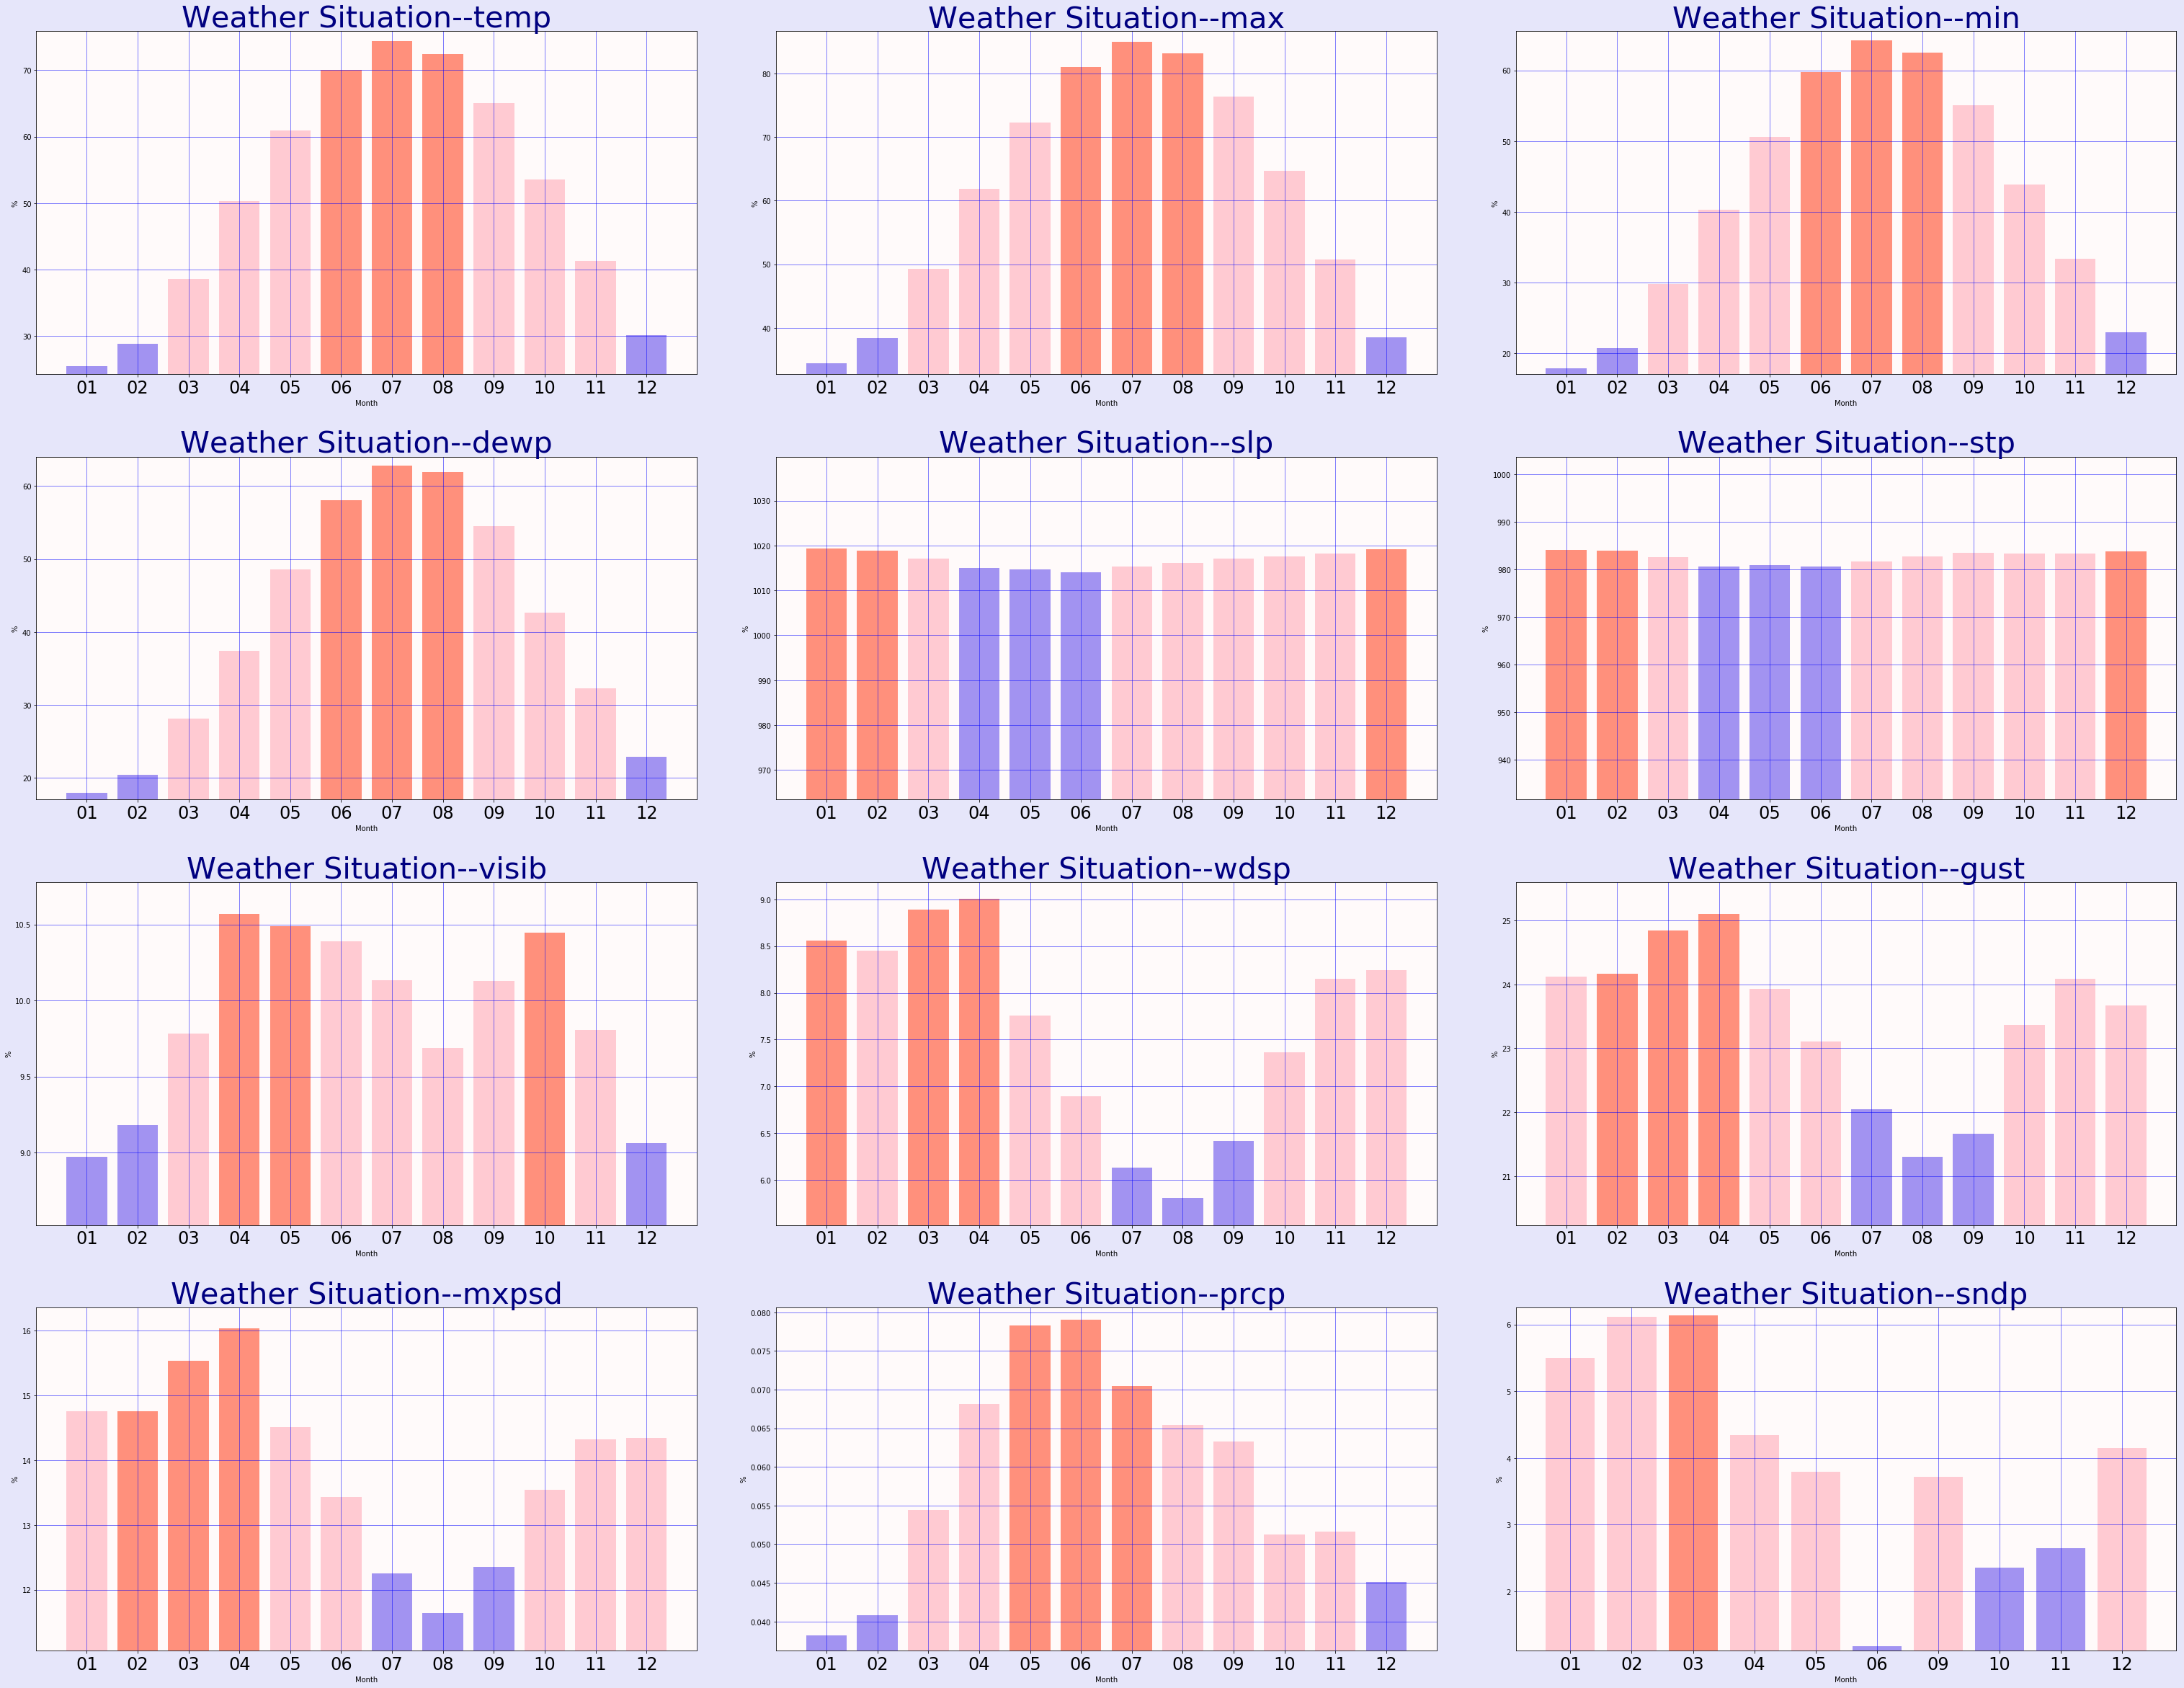

In [9]:
weatheCol=['temp','max','min','dewp','slp','stp','visib','wdsp','gust','mxpsd','prcp','sndp']



#設定繪圖控制
fig, axs = plt.subplots(4,3, figsize=(30, 12), facecolor='lavender', edgecolor='k')
fig.subplots_adjust(left=None, bottom=0.4, right=1.5, top=3,hspace = .24, wspace=.12)
plt.rcParams['font.size']=24
plt.rcParams['font.family']=['Arial Unicode MS']

#設定組圖變數
plotList=[[v,x] for v,x in zip(list(range(len(weatheCol))),weatheCol)]
axs = axs.ravel()

for i,j in plotList:
    #設定顏色
    dfa=pd.DataFrame({'pf':weatherMS(dataMean(j,['date2']),'date2')}) 
    dfa['rank']=dfa['pf'].rank()#大小分級
    dfa['colors'] = ['tomato' if x>9 else 'mediumslateblue' if x<4 else 'lightpink' for x in dfa['rank']]
    axs[i].set_facecolor('snow')
    axs[i].bar(range(len(dfa['pf'])),dfa['pf'],color=dfa['colors'],linewidth=3.2,alpha=0.7)
    axs[i].set_xticks(range(len(dfa['pf'])))
    axs[i].set_xticklabels(dfa['pf'].index,fontsize='medium')
    axs[i].set_ylim(dfa['pf'].min()*0.95,dfa['pf'].max()*1.02)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('%')
    axs[i].set_title('Weather Situation--'+j,fontsize='xx-large',color='Navy')
    axs[i].grid(color='b', linestyle='-', linewidth=0.5)
    

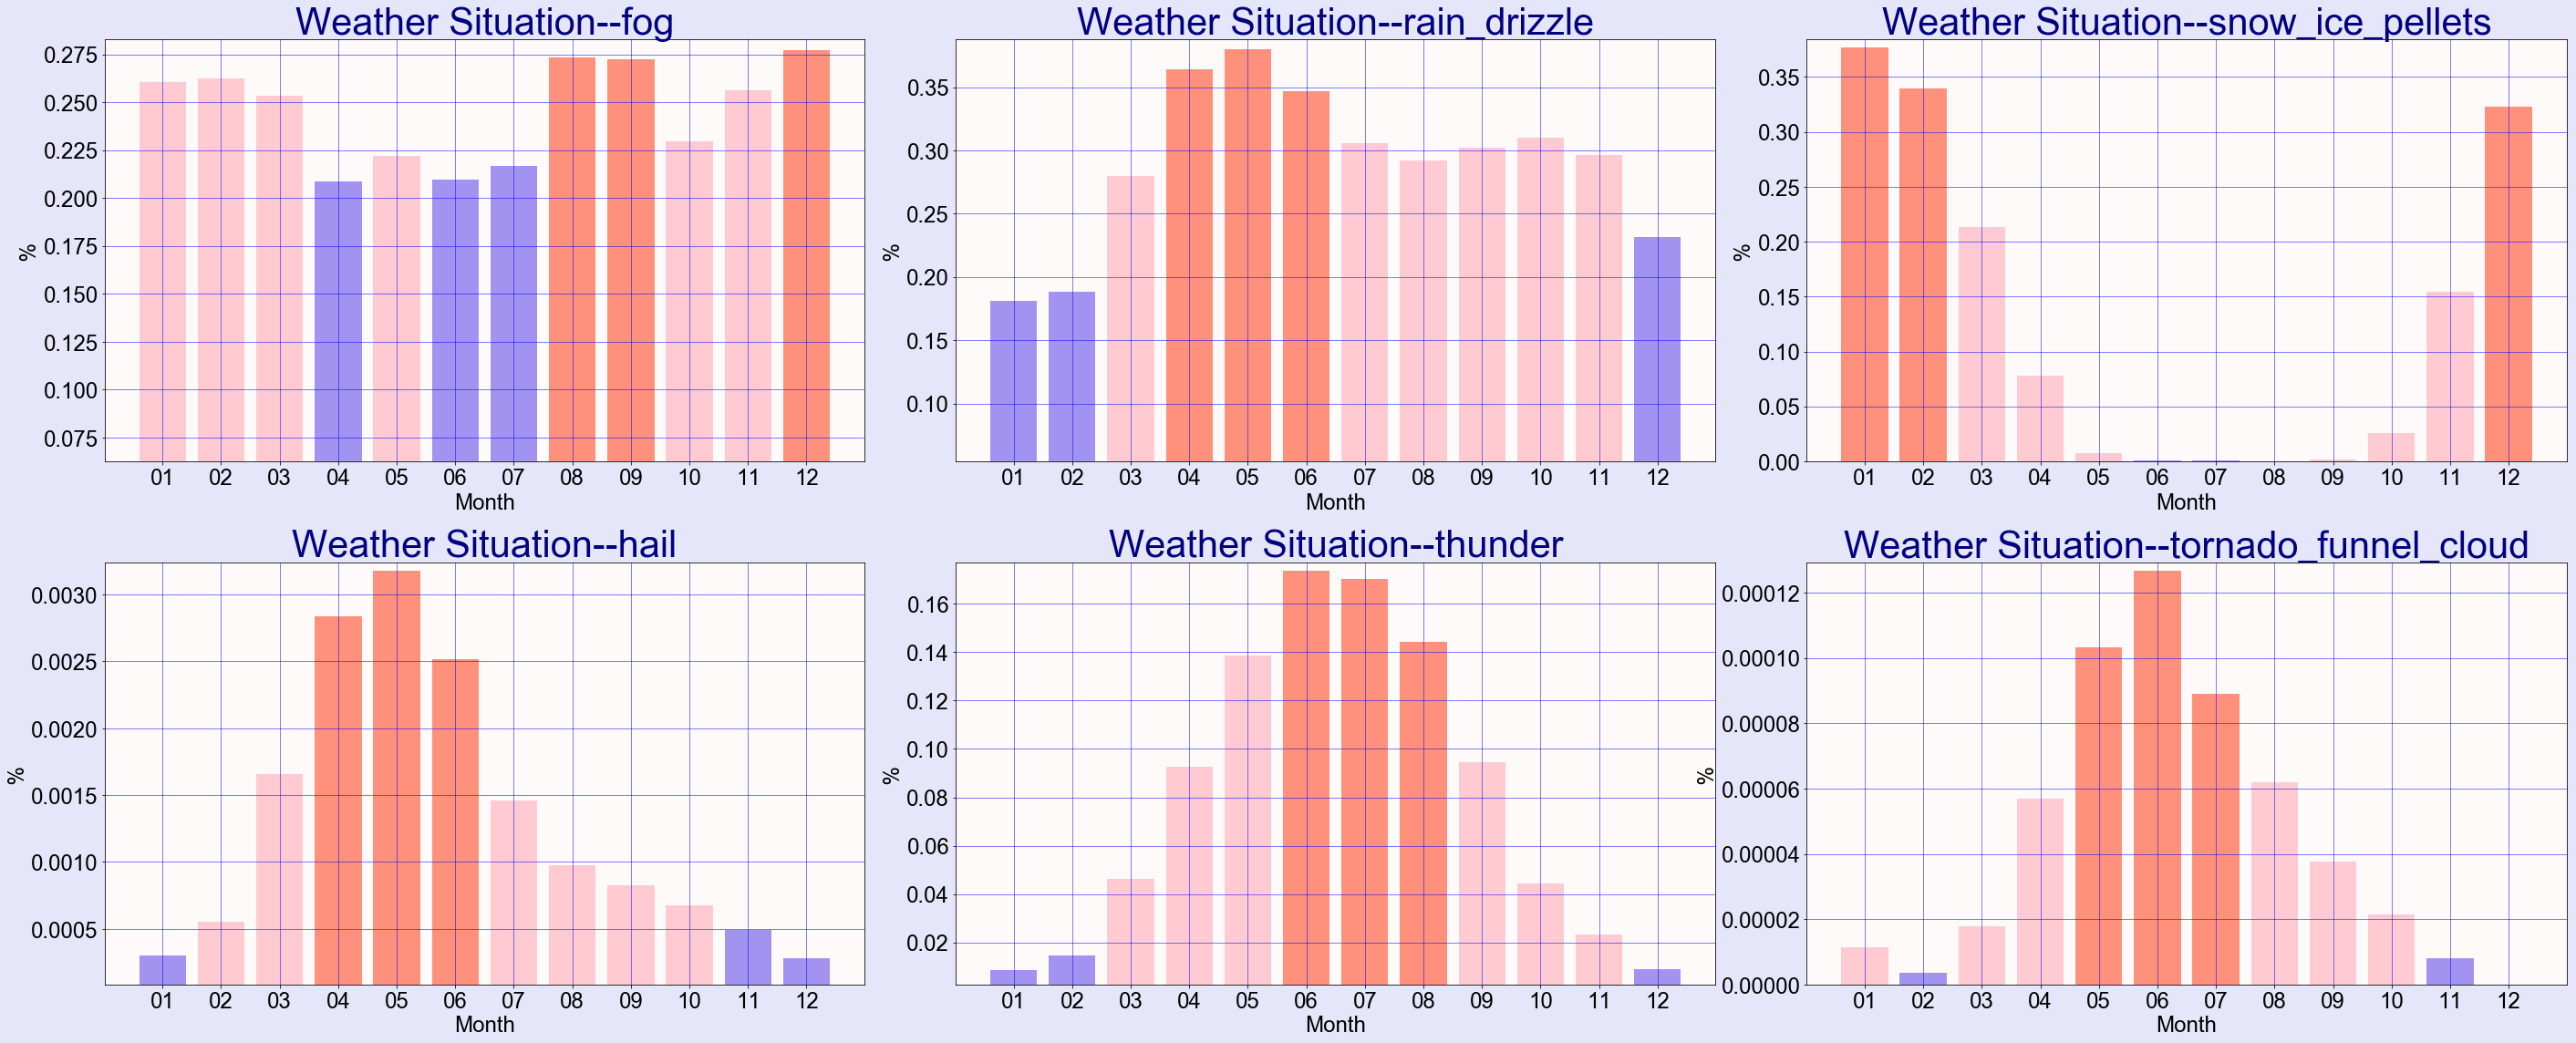

In [10]:
weatheCol=['fog','rain_drizzle','snow_ice_pellets','hail','thunder','tornado_funnel_cloud']


#設定繪圖控制
fig, axs = plt.subplots(2,3, figsize=(20, 8), facecolor='lavender', edgecolor='k')
fig.subplots_adjust(left=None, bottom=0.2, right=2, top=2,hspace = .24, wspace=.12)
plt.rcParams['font.size']=24
plt.rcParams['font.family']=['Arial Unicode MS']

#設定組圖變數
plotList=[[v,x] for v,x in zip(list(range(len(weatheCol))),weatheCol)]
axs = axs.ravel()

for i,j in plotList:
    #設定顏色
    dfa=pd.DataFrame({'pf':weatherMS(dataMean(j,['date2']),'date2')}) 
    dfa['rank']=dfa['pf'].rank()#大小分級
    dfa['colors'] = ['tomato' if x>9 else 'mediumslateblue' if x<4 else 'lightpink' for x in dfa['rank']]
    axs[i].set_facecolor('snow')
    axs[i].bar(range(len(dfa['pf'])),dfa['pf'],color=dfa['colors'],linewidth=3.2,alpha=0.7)
    axs[i].set_xticks(range(len(dfa['pf'])))
    axs[i].set_xticklabels(dfa['pf'].index,fontsize='medium')
    axs[i].set_ylim(dfa['pf'].min()*0.3,dfa['pf'].max()*1.02)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('%')
    axs[i].set_title('Weather Situation--'+j,fontsize='xx-large',color='Navy')
    axs[i].grid(color='b', linestyle='-', linewidth=0.5)

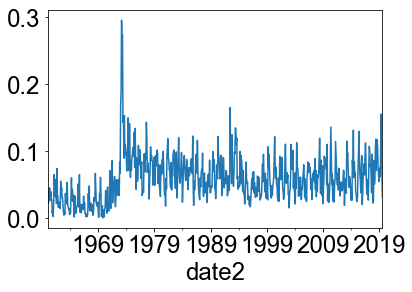

In [11]:
dataMean('prcp',['date2']).plot()

In [12]:
df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea.pickle')
df

,,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,count_slp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
stn,date,,,,,,,,,,,,,,,,,,,,,
725377,1960-01-01,14804,1960,1,1,27.8,24,25.5,24,1030.0,8,...,*,0.00,I,999.9,1,0,0,0,0,0
724296,1960-01-01,13841,1960,1,1,28.9,24,22.4,24,1027.7,8,...,*,0.00,I,999.9,0,0,0,0,0,0
724285,1960-01-01,13812,1960,1,1,29.4,24,23.6,24,1028.8,8,...,*,0.00,I,999.9,0,0,0,0,0,0
724338,1960-01-01,13802,1960,1,1,30.8,24,24.6,24,1023.5,8,...,*,0.00,I,999.9,0,0,0,0,0,0
725300,1960-01-01,94846,1960,1,1,30.7,24,23.9,24,1026.2,24,...,NaN,0.00,G,999.9,0,0,0,0,0,0
725310,1960-01-01,14806,1960,1,1,28.9,24,23.5,24,1025.9,8,...,*,0.00,I,999.9,0,0,0,0,0,0
725335,1960-01-01,99999,1960,1,1,27.5,24,21.8,24,1026.8,8,...,*,0.00,I,999.9,0,0,0,0,0,0
724550,1960-01-01,13947,1960,1,1,37.0,24,32.9,24,1012.5,8,...,*,99.99,NaN,999.9,1,1,0,0,0,0
690110,1960-01-01,99999,1960,1,1,17.6,24,14.9,24,1010.3,8,...,*,99.99,NaN,999.9,1,0,1,0,0,0


In [13]:
weatheCol=['fog','rain_drizzle','snow_ice_pellets','hail','thunder','tornado_funnel_cloud']


short=pd.concat([dataMean(i,['date']) for i in weatheCol],axis=1)
short['extremeClimate']=short.T.sum()
short


,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,extremeClimate
date,,,,,,,
1960-01-01,0.350000,0.200000,0.250000,0.000000,0.000000,0.0,0.800000
1960-01-02,0.714286,0.857143,0.285714,0.000000,0.000000,0.0,1.857143
1960-01-03,0.571429,0.523810,0.666667,0.000000,0.000000,0.0,1.761905
1960-01-04,0.050000,0.000000,0.450000,0.000000,0.000000,0.0,0.500000
1960-01-05,0.100000,0.000000,0.400000,0.000000,0.000000,0.0,0.500000
1960-01-06,0.142857,0.095238,0.238095,0.000000,0.000000,0.0,0.476190
1960-01-07,0.142857,0.142857,0.190476,0.000000,0.000000,0.0,0.476190
1960-01-08,0.047619,0.000000,0.238095,0.000000,0.000000,0.0,0.285714
1960-01-09,0.428571,0.095238,0.190476,0.000000,0.000000,0.0,0.714286
